The Required data set is People.csv
Create an HR analytics to analyse and identify the company's employees attrition-causing aspects. The solution must provide insight into the basic causes of employee attrition, such as to observe possible trends, patterns, or certain factors impacting attrition. Provide practical suggestions and approaches for reducing attrition rates and enhance retention of staff in considering the results obtained.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("People.csv")

In [5]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [8]:
df.tail(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
14989,0.69,0.70,3,212,2,0,0,0,product_mng,medium
14990,0.73,0.52,3,274,2,0,0,0,technical,high
14991,0.85,0.53,3,250,3,0,0,0,IT,medium
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low
14998,0.77,0.83,6,271,3,0,0,0,support,low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.isnull()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995    False
14996    False
14997    False
14998    False
Length: 14999, dtype: bool

In [16]:
df.duplicated().sum()

3008

In [17]:
df[df.duplicated()]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
# BIASED COLUMNS - satisfactoryLevel , lastEvaluation , (If manager resist workAccident)
# SEMI_BIASED COLUMNS - avgMonthlyHours 

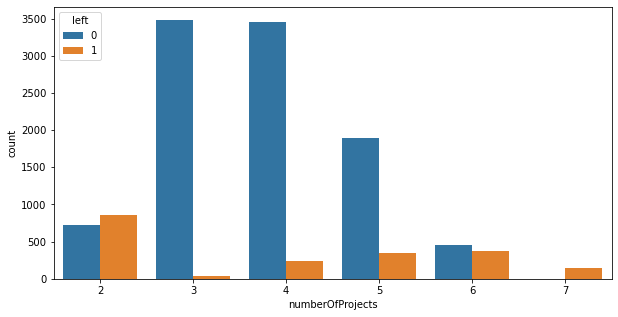

In [26]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x="numberOfProjects",hue="left")


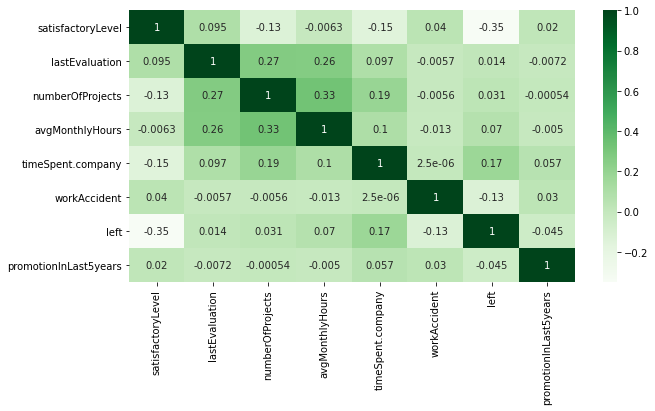

In [27]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [ ]:
# highest postive co relation numberofproject,avgmonthlyhours
#  highest negative co relation left, satisfactorylevel

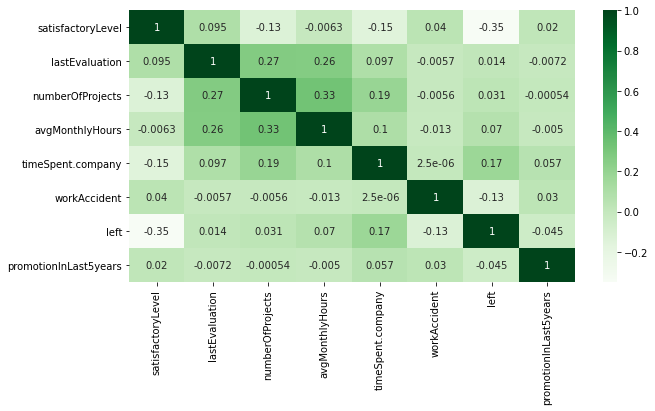

In [28]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
a=df.select_dtypes(include=['float64','int64'])

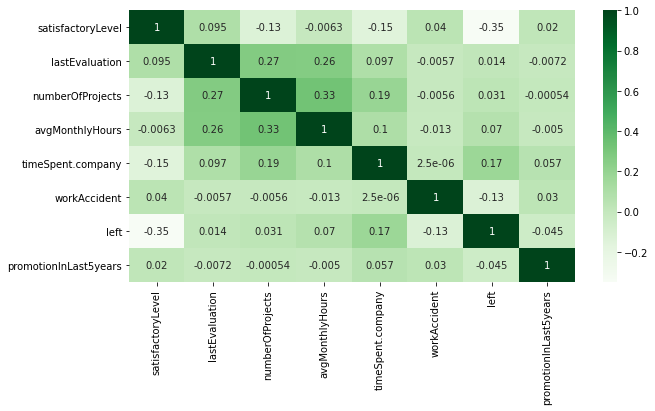

In [32]:
a=df.select_dtypes(include=['float64','int64'])
df_corr=a.corr()
fig=plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')



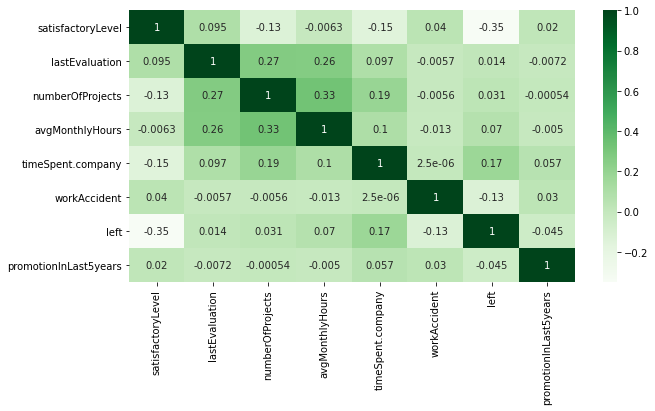

In [33]:
a=df.select_dtypes(include=['float64','int64'])
df_corr=a.corr()
fig=plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

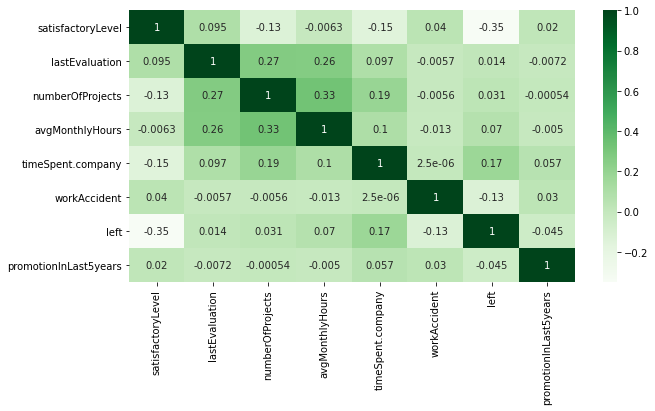

In [34]:
a = df.select_dtypes(include=['float64', 'int64'])
df_corr = a.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, cmap='Greens')
plt.show()


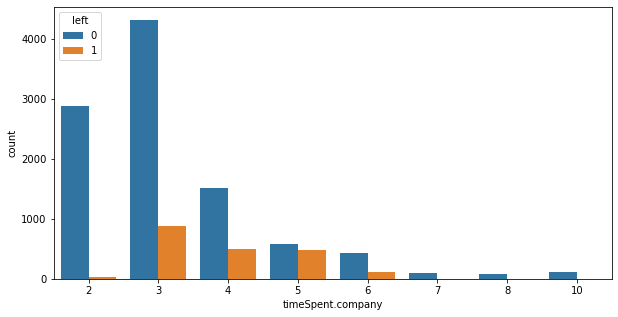

In [35]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x="timeSpent.company",hue="left")

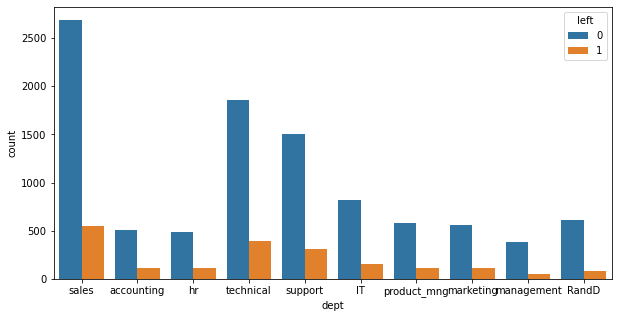

In [36]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x="dept",hue="left")

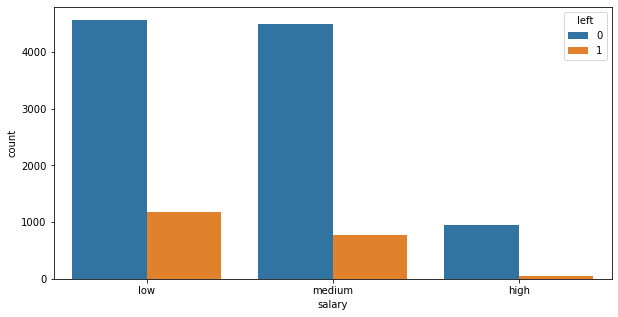

In [37]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x="salary",hue="left")